In [1117]:
import copy
import json
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

In [1118]:
with open('guests2.json', 'r') as f:
    data = json.load(f)

In [1119]:
data

{'guests': [{'name': 'Emma Johnson', 'categories': ['bride']},
  {'name': 'John Smith', 'categories': ['groom']},
  {'name': 'Liam Johnson', 'categories': ['family_of_bride']},
  {'name': 'Sophia Johnson', 'categories': ['family_of_bride']},
  {'name': 'Olivia Smith', 'categories': ['family_of_groom']},
  {'name': 'Noah Smith', 'categories': ['family_of_groom']},
  {'name': 'Grace Johnson', 'categories': ['family_of_bride']},
  {'name': 'Lucas Johnson', 'categories': ['family_of_bride']},
  {'name': 'Charlotte Johnson', 'categories': ['family_of_bride']},
  {'name': 'William Johnson', 'categories': ['family_of_bride']},
  {'name': 'Hannah Johnson', 'categories': ['family_of_bride']},
  {'name': 'Michael Green', 'categories': ['family_of_bride']},
  {'name': 'Mia Johnson', 'categories': ['family_of_bride']},
  {'name': 'James Turner', 'categories': ['family_of_bride']},
  {'name': 'Henry White', 'categories': ['family_of_bride']},
  {'name': 'Ella Davis', 'categories': ['family_of_bride

In [1120]:
G = nx.Graph()

In [1121]:
def create_abbreviation(full_name):
    parts = full_name.split()
    if len(parts) == 2:
        return f'{parts[0][0]}{parts[1][0]}'
    return full_name

In [1122]:
abbreviations = {guest["name"]: create_abbreviation(guest["name"]) for guest in data["guests"]}

In [1123]:
# abbreviations

In [1124]:
for guest in data["guests"]:
    G.add_node(abbreviations[guest["name"]], categories=guest["categories"])

In [1125]:
G.nodes()

NodeView(('EJ', 'JS', 'LJ', 'SJ', 'OS', 'NS', 'GJ', 'CJ', 'WJ', 'HJ', 'MG', 'MJ', 'JT', 'HW', 'ED', 'BD', 'ID', 'AW', 'JD', 'VP', 'DP', 'EP', 'SL', 'AL', 'AG', 'NP', 'CB', 'AS', 'MC', 'LP', 'CP', 'HP', 'OM', 'NB', 'IB', 'AB', 'LC', 'EC', 'ZC', 'GC', 'LH', 'MH', 'IK', 'RK', 'ZM', 'AM', 'HL', 'JW', 'MA', 'EA', 'JC', 'TE', 'NH', 'LM', 'KR', 'TS', 'EF', 'JY', 'AC', 'CF', 'SB', 'JB'))

In [1126]:
category_weight_mapping = {
    ("bride", "groom"): 100,  # Very strong positive weight as married couple should sit together
    ("family_of_bride", "family_of_bride"): 8,  # Positive weight for people in the same family group
    ("family_of_groom", "family_of_groom"): 8,
    ("family_of_bride", "family_of_groom"): -2,  # Slightly negative weight as families may prefer to sit separately
    ("friend", "friend"): 5,  # Positive weight for friends
    ("single", "single"): 5,  # Positive weight for singles
    
    ("bride", "friend"): -30,
    ("bride", "family_of_groom"): -30,
    ("bride", "family_of_bride"): -30,
    ("groom", "friend"): -30,
    ("groom", "family_of_groom"): -30,
    ("groom", "family_of_bride"): -30,
}

In [1127]:
# Add edges with weights based on categories
for guest1 in data["guests"]:
    for guest2 in data["guests"]:
        if guest1 == guest2:
            continue
        name1, name2 = abbreviations[guest1["name"]], abbreviations[guest2["name"]]
        categories1, categories2 = guest1["categories"], guest2["categories"]

        # Calculate the total weight based on matching categories
        total_weight = 0  # Initialize total weight to 0
        for cat1 in categories1:
            for cat2 in categories2:
                weight = category_weight_mapping.get((cat1, cat2)) or category_weight_mapping.get((cat2, cat1))
                if weight:
                    total_weight += weight

        # Only add an edge if a meaningful relationship is found
        if total_weight != 0:
            G.add_edge(name1, name2, weight=total_weight)

In [1128]:
# Add specific relationships from the JSON if needed (overrides any category-based weights)
for relationship in data["relationships"]:
    guest1_abbr = abbreviations[relationship["guest1"]]
    guest2_abbr = abbreviations[relationship["guest2"]]
    G.add_edge(
        guest1_abbr,
        guest2_abbr,
        weight=relationship["weight"],
    )

In [1129]:
G.edges(data=True)

EdgeDataView([('EJ', 'JS', {'weight': -30}), ('EJ', 'LJ', {'weight': -2}), ('EJ', 'SJ', {'weight': -2}), ('EJ', 'OS', {'weight': 8}), ('EJ', 'NS', {'weight': 8}), ('EJ', 'GJ', {'weight': -2}), ('EJ', 'CJ', {'weight': -2}), ('EJ', 'WJ', {'weight': -2}), ('EJ', 'HJ', {'weight': -2}), ('EJ', 'MG', {'weight': -2}), ('EJ', 'MJ', {'weight': -2}), ('EJ', 'JT', {'weight': -2}), ('EJ', 'HW', {'weight': -2}), ('EJ', 'ED', {'weight': -2}), ('EJ', 'BD', {'weight': -2}), ('EJ', 'ID', {'weight': -2}), ('EJ', 'AW', {'weight': -2}), ('EJ', 'JD', {'weight': -2}), ('EJ', 'VP', {'weight': -2}), ('EJ', 'DP', {'weight': -2}), ('EJ', 'EP', {'weight': -2}), ('EJ', 'SL', {'weight': -2}), ('EJ', 'AL', {'weight': -2}), ('EJ', 'AG', {'weight': -2}), ('EJ', 'NP', {'weight': -2}), ('EJ', 'AS', {'weight': 8}), ('EJ', 'LP', {'weight': 8}), ('EJ', 'CP', {'weight': 8}), ('EJ', 'HP', {'weight': 8}), ('EJ', 'NB', {'weight': 8}), ('EJ', 'IB', {'weight': 8}), ('EJ', 'AB', {'weight': -30}), ('EJ', 'LC', {'weight': 8}), ('E

{('EJ', 'JS'): Text(0.513827178297189, -0.43898501575049736, '-30'),
 ('EJ', 'LJ'): Text(0.44065770911013313, 0.20317763948490228, '-2'),
 ('EJ', 'SJ'): Text(0.42925984909175674, 0.17545574473479825, '-2'),
 ('EJ', 'OS'): Text(0.5604218913813406, 0.22731269292337694, '8'),
 ('EJ', 'NS'): Text(0.5635134371078931, 0.24172444648477645, '8'),
 ('EJ', 'GJ'): Text(0.4531029709748328, 0.21586629114687164, '-2'),
 ('EJ', 'CJ'): Text(0.46249183922025566, 0.17575519410487783, '-2'),
 ('EJ', 'WJ'): Text(0.49011628579719874, 0.1951613648493248, '-2'),
 ('EJ', 'HJ'): Text(0.45851717246079904, 0.19989573379053627, '-2'),
 ('EJ', 'MG'): Text(0.4877039168652437, 0.20597057023739168, '-2'),
 ('EJ', 'MJ'): Text(0.4429057418713236, 0.20964542584871862, '-2'),
 ('EJ', 'JT'): Text(0.4133740597255919, 0.19373658964345422, '-2'),
 ('EJ', 'HW'): Text(0.45817350440783405, 0.2217764887964896, '-2'),
 ('EJ', 'ED'): Text(0.4763473098136195, 0.2162161411572141, '-2'),
 ('EJ', 'BD'): Text(0.45951457337750634, 0.211

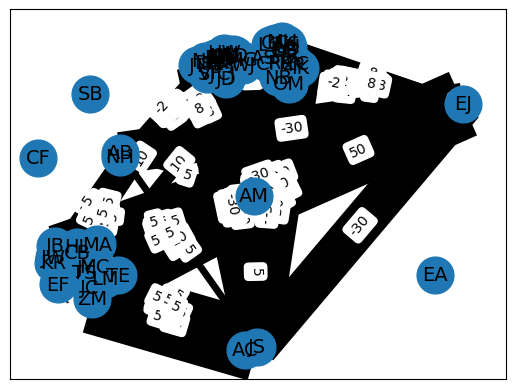

In [1130]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=14, font_family="sans-serif")
edges = G.edges(data=True)
weights = [data['weight'] for u, v, data in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[abs(weight) for weight in weights])
edge_labels = {(u, v): f'{data["weight"]}' for u, v, data in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

In [1131]:
SIDE_LEFT = 'left'
SIDE_FRONT = 'front'
SIDE_RIGHT = 'right'
SIDE_BACK = 'back'

In [1132]:
tables = [
    {SIDE_FRONT: 6},                   # Table 1
    {SIDE_LEFT: 10, SIDE_RIGHT: 10},   # Table 2
    {SIDE_LEFT: 8, SIDE_RIGHT: 8},     # Table 3
    {SIDE_LEFT: 8, SIDE_RIGHT: 8},     # Table 4
    {SIDE_LEFT: 10, SIDE_RIGHT: 10},   # Table 5
    {SIDE_LEFT: 10, SIDE_RIGHT: 10}    # Table 6
]

In [1133]:
def generate_initial_solution(G):
    guest_list = list(G.nodes())
    random.shuffle(guest_list)
    
    index = 0
    filled_tables = copy.deepcopy(tables)
    for table in filled_tables:
        for key in table:
            # Get the number of None values
            length = table[key]
            # Replace None values with data_list values
            table[key] = guest_list[index:index + length] or [None] * length
            index += length
    return filled_tables

In [1134]:
# arrangement = generate_initial_solution(G)

In [1135]:
def cooling_schedule(initial_temp, iteration, cooling_rate):
    return initial_temp * (1 / (1 + cooling_rate * iteration))

In [1136]:
def get_opposite_side(pos):
    if pos == SIDE_LEFT:
        return SIDE_RIGHT
    elif pos == SIDE_FRONT:
        return SIDE_BACK
    elif pos == SIDE_RIGHT:
        return SIDE_LEFT
    elif pos == SIDE_BACK:
        return SIDE_FRONT
    raise ValueError('Invalid side')

In [1137]:
initial_temp = 1000
cooling_rate = 0.99
max_iterations = 10000

In [1138]:
adjacent_multiplier = 1.
corner_multiplier = 1.
opposite_multiplier = 0.75

In [1139]:
# arrangement

In [1140]:
# print_seating_arrangement(arrangement)

In [1141]:
count_opposite = True  # Toggle to check opposite guests
count_corners = True   # Toggle to check corner guests

In [1142]:
def calculate_total_weight(G, arrangement, tables):
    total_weight = 0
    penalty = 0
    
    # Loop through each table and position to perform relationship checks based on booleans
    for table_id, table in enumerate(arrangement):
        positions = list(table.keys())  # List of positions (sides) of the table
        num_positions = len(positions)  # Number of sides at the table

        for pos_idx, pos in enumerate(positions):
            guests = table[pos]  # Guests sitting on the current side
            guests_num = len(guests)  # Number of guests on the current side

            # Check for adjacent guests on the same side
            for guest_idx in range(guests_num - 1):  # Loop through guests on the same side
                guest1 = guests[guest_idx]  # Current guest
                guest2 = guests[guest_idx + 1]  # Next guest on the same side
                if G.has_edge(guest1, guest2):
                    weight = G[guest1][guest2]['weight']
                    if weight > 0:
                        total_weight += (weight * adjacent_multiplier)
                    else:
                        total_weight += (weight / adjacent_multiplier)
#                     print(f"Adjacent relation between {guest1} and {guest2} of {weight}.")

            # Check opposite guests if count_opposite is True
            if count_opposite and pos in [SIDE_LEFT, SIDE_FRONT]:
                opposite_pos = get_opposite_side(pos)
                if opposite_pos in positions:
                    opposite_pos_id = positions.index(opposite_pos)
                    opposite_guests = table.get(positions[opposite_pos_id])
                    if opposite_guests:
                        for idx, guest1 in enumerate(guests):
                            if idx < len(opposite_guests):
                                guest2 = opposite_guests[idx]
                                if G.has_edge(guest1, guest2):
                                    weight = G[guest1][guest2]['weight']
                                    if weight > 0:
                                        total_weight += (weight * opposite_multiplier)
                                    else:
                                        total_weight += (weight / opposite_multiplier)
#                                     print(f"Opposite relation between {guest1} and {guest2} of {weight}.")

        # Check corner guests if count_corners is True
        if count_corners:
            if SIDE_LEFT in positions and SIDE_FRONT in positions:
                if SIDE_FRONT in positions:
                    guest1 = table[SIDE_LEFT][0]
                    guest2 = table[SIDE_FRONT][0]
                    if G.has_edge(guest1, guest2):
                        weight = G[guest1][guest2]['weight']
                        if weight > 0:
                            total_weight += (weight * corner_multiplier)
                        else:
                            total_weight += (weight / corner_multiplier)
#                         print(f"Corner relation between {guest1} and {guest2} of {weight}.")

            if SIDE_BACK in positions and SIDE_LEFT in positions and len(table[SIDE_LEFT]) > 1:
                    guest1 = table[SIDE_LEFT][-1]
                    guest2 = table[SIDE_BACK][0]
                    if G.has_edge(guest1, guest2):
                        weight = G[guest1][guest2]['weight']
                        if weight > 0:
                            total_weight += (weight * corner_multiplier)
                        else:
                            total_weight += (weight / corner_multiplier)
#                         print(f"Corner relation between {guest1} and {guest2} of {weight}.")

            if SIDE_RIGHT in positions and SIDE_FRONT in positions and len(table[SIDE_FRONT]) > 1:
                if SIDE_FRONT in positions:
                    guest1 = table[SIDE_RIGHT][0]
                    guest2 = table[SIDE_FRONT][-1]
                    if G.has_edge(guest1, guest2):
                        weight = G[guest1][guest2]['weight']
                        if weight > 0:
                            total_weight += (weight * corner_multiplier)
                        else:
                            total_weight += (weight / corner_multiplier)
#                         print(f"Corner relation between {guest1} and {guest2} of {weight}.")

            if SIDE_BACK in positions and SIDE_RIGHT in positions and len(table[SIDE_RIGHT]) > 1 and len(table[SIDE_BACK] > 1):
                    guest1 = table[SIDE_RIGHT][-1]
                    guest2 = table[SIDE_BACK][-1]            
                    if G.has_edge(guest1, guest2):
                        weight = G[guest1][guest2]['weight']
                        if weight > 0:
                            total_weight += (weight * corner_multiplier)
                        else:
                            total_weight += (weight / corner_multiplier)
#                         print(f"Corner relation between {guest1} and {guest2} of {weight}.")

    return total_weight + penalty

In [1143]:
# calculate_total_weight(G, arrangement, tables)

In [1144]:
def apply_move(arrangement):
    new_arrangement = [table.copy() for table in arrangement]

    # Select two random tables
    table1_idx, table2_idx = random.choices(range(len(arrangement)), k=2)
    table1 = new_arrangement[table1_idx]
    table2 = new_arrangement[table2_idx]

    # Select random positions within the chosen tables
    position1 = random.choice(list(table1.keys()))
    position2 = random.choice(list(table2.keys()))

    # Select random guest from the chosen positions
    guest1_idx = random.randint(0, len(table1[position1]) - 1)
    guest2_idx = random.randint(0, len(table2[position2]) - 1)

    # Swap the guests
    table1[position1][guest1_idx], table2[position2][guest2_idx] = table2[position2][guest2_idx], table1[position1][guest1_idx]

    return new_arrangement

In [1145]:
# apply_move(generate_initial_solution(G))

In [1146]:
def simulated_annealing(G, initial_temp, cooling_rate, max_iterations, arrangement=None):
    print(f'Running simulation...')
    if arrangement is None:
        current_arrangement = generate_initial_solution(G)
    else:
        current_arrangement = copy.deepcopy(arrangement)

    current_weight = calculate_total_weight(G, current_arrangement, tables)
    print(f'Initial weight: {current_weight}')
#     print(f'Initial arrangement: {current_arrangement}')

    best_arrangement = copy.deepcopy(current_arrangement)
    best_weight = current_weight

    temp = initial_temp

    for iteration in range(max_iterations):
        new_arrangement = apply_move(current_arrangement)

        new_weight = calculate_total_weight(G, new_arrangement, tables)
#         print(f'New arrangement weight: {new_weight}')
#         print(f'New arrangement: {new_arrangement}')
        delta_weight = new_weight - current_weight

        if delta_weight > 0 or random.uniform(0, 1) < math.exp(delta_weight / temp):
            current_arrangement = copy.deepcopy(new_arrangement)
            current_weight = new_weight

            if new_weight > best_weight:
                best_arrangement = copy.deepcopy(new_arrangement)
                best_weight = new_weight
                print(f'[!] New best weight: {best_weight}')

        temp = cooling_schedule(initial_temp, iteration, cooling_rate)

    return best_arrangement, best_weight

In [1147]:
def print_seating_arrangement(arrangement):
    for i, table in enumerate(arrangement):
        print(f"Table {i + 1}:")
        for pos, values in table.items():
                print(f"  {pos.capitalize()}: [{', '.join(v if v is not None else 'Empty seat' for v in values)}]")
        print()

In [1148]:
best_solution = None
best_weight = 0

tries = 0
while tries < 10:
    solution, weight = simulated_annealing(G, initial_temp, cooling_rate, max_iterations, arrangement=best_solution)
    if weight > best_weight:
        best_weight = weight
        best_solution = solution
        tries = 0
    else:
        tries += 1
        
print("Best weight:", best_weight)

Running simulation...
Initial weight: 14.166666666666675
[!] New best weight: 20.833333333333332
[!] New best weight: 45.333333333333336
[!] New best weight: 47.33333333333334
[!] New best weight: 50.00000000000001
[!] New best weight: 55.33333333333334
[!] New best weight: 58.50000000000001
[!] New best weight: 78.5
[!] New best weight: 82.91666666666667
[!] New best weight: 122.91666666666667
[!] New best weight: 141.25
[!] New best weight: 145.41666666666666
[!] New best weight: 161.5
Running simulation...
Initial weight: 161.5
[!] New best weight: 167.75
[!] New best weight: 169.83333333333334
Running simulation...
Initial weight: 169.83333333333334
[!] New best weight: 174.83333333333334
[!] New best weight: 185.16666666666666
Running simulation...
Initial weight: 185.16666666666666
[!] New best weight: 187.83333333333331
[!] New best weight: 191.16666666666669
[!] New best weight: 194.83333333333331
Running simulation...
Initial weight: 194.83333333333331
[!] New best weight: 213

In [1149]:
print_seating_arrangement(best_solution)

Table 1:
  Front: [Empty seat, Empty seat, CF, Empty seat, Empty seat, Empty seat]

Table 2:
  Left: [IK, EC, Empty seat, OM, Empty seat, AC, AB, Empty seat, CP, NB]
  Right: [EA, Empty seat, Empty seat, HP, Empty seat, AG, ZC, NS, MH, AS]

Table 3:
  Left: [HL, Empty seat, EJ, AM, JB, TS, Empty seat, Empty seat]
  Right: [BD, SJ, GJ, MC, LM, AW, JD, Empty seat]

Table 4:
  Left: [LC, RK, TE, AL, JC, LJ, MJ, HJ]
  Right: [LP, Empty seat, SB, NH, OS, IB, ID, Empty seat]

Table 5:
  Left: [GC, Empty seat, Empty seat, EF]
  Right: [Empty seat, ED, Empty seat, MA, JS, ZM, KR, Empty seat, CB, Empty seat]

Table 6:
  Left: [Empty seat, MG, WJ, EP, CJ, SL, DP, HW, Empty seat, Empty seat]
  Right: [JY, JW, VP, LH, Empty seat, Empty seat, Empty seat, JT, NP, Empty seat]

